# Central Limit Theorem

The Central Limit Theorem is a fundamental concept in statistics that states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables will be approximately normally distributed, regardless of the original distribution of the variables. 

In simpler terms, it suggests that when you add up many random variables, even if they don't follow a normal distribution individually, their sum will tend to follow a normal distribution.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor
import scienceplots

# Default configuaration for matplotlib
plt.style.use(["science", "ieee", "grid"])
plt.rcParams["figure.figsize"] = (10, 5)

## Collatz Conjecture

Consider the following operations for an arbitrary positve integer $n$,
$$n = \begin{cases} n / 2, & \text{n in even} \\ 3n+1, & \text{n is odd}\end{cases}$$

The conjecture states that repeating this process will eventually reach 1, regardless of which positive integer is chosen initially.

The steps required to reach 1 is calculated for set of positive integers. A random sample is chosen from them and the mean of steps requried for each number in that sample is calculated. This experiment when repeated a large number of times resembles a normal distribution.

In [2]:
# Function to calculate the number to steps required to reach 1
@np.vectorize
def collatz_steps_to_1(n):
    count = 0
    while n > 1:
        count += 1
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1

    return count

In [3]:
min_int = 5  # Starting positive integer for calculating required steps
max_int = 1000  # Ending positive integer for calculating required steps

# Steps required to reach 1 in Collatz conjecture from `min_int` to `max_int`
collatz_steps = collatz_steps_to_1(np.arange(min_int, max_int, 1))

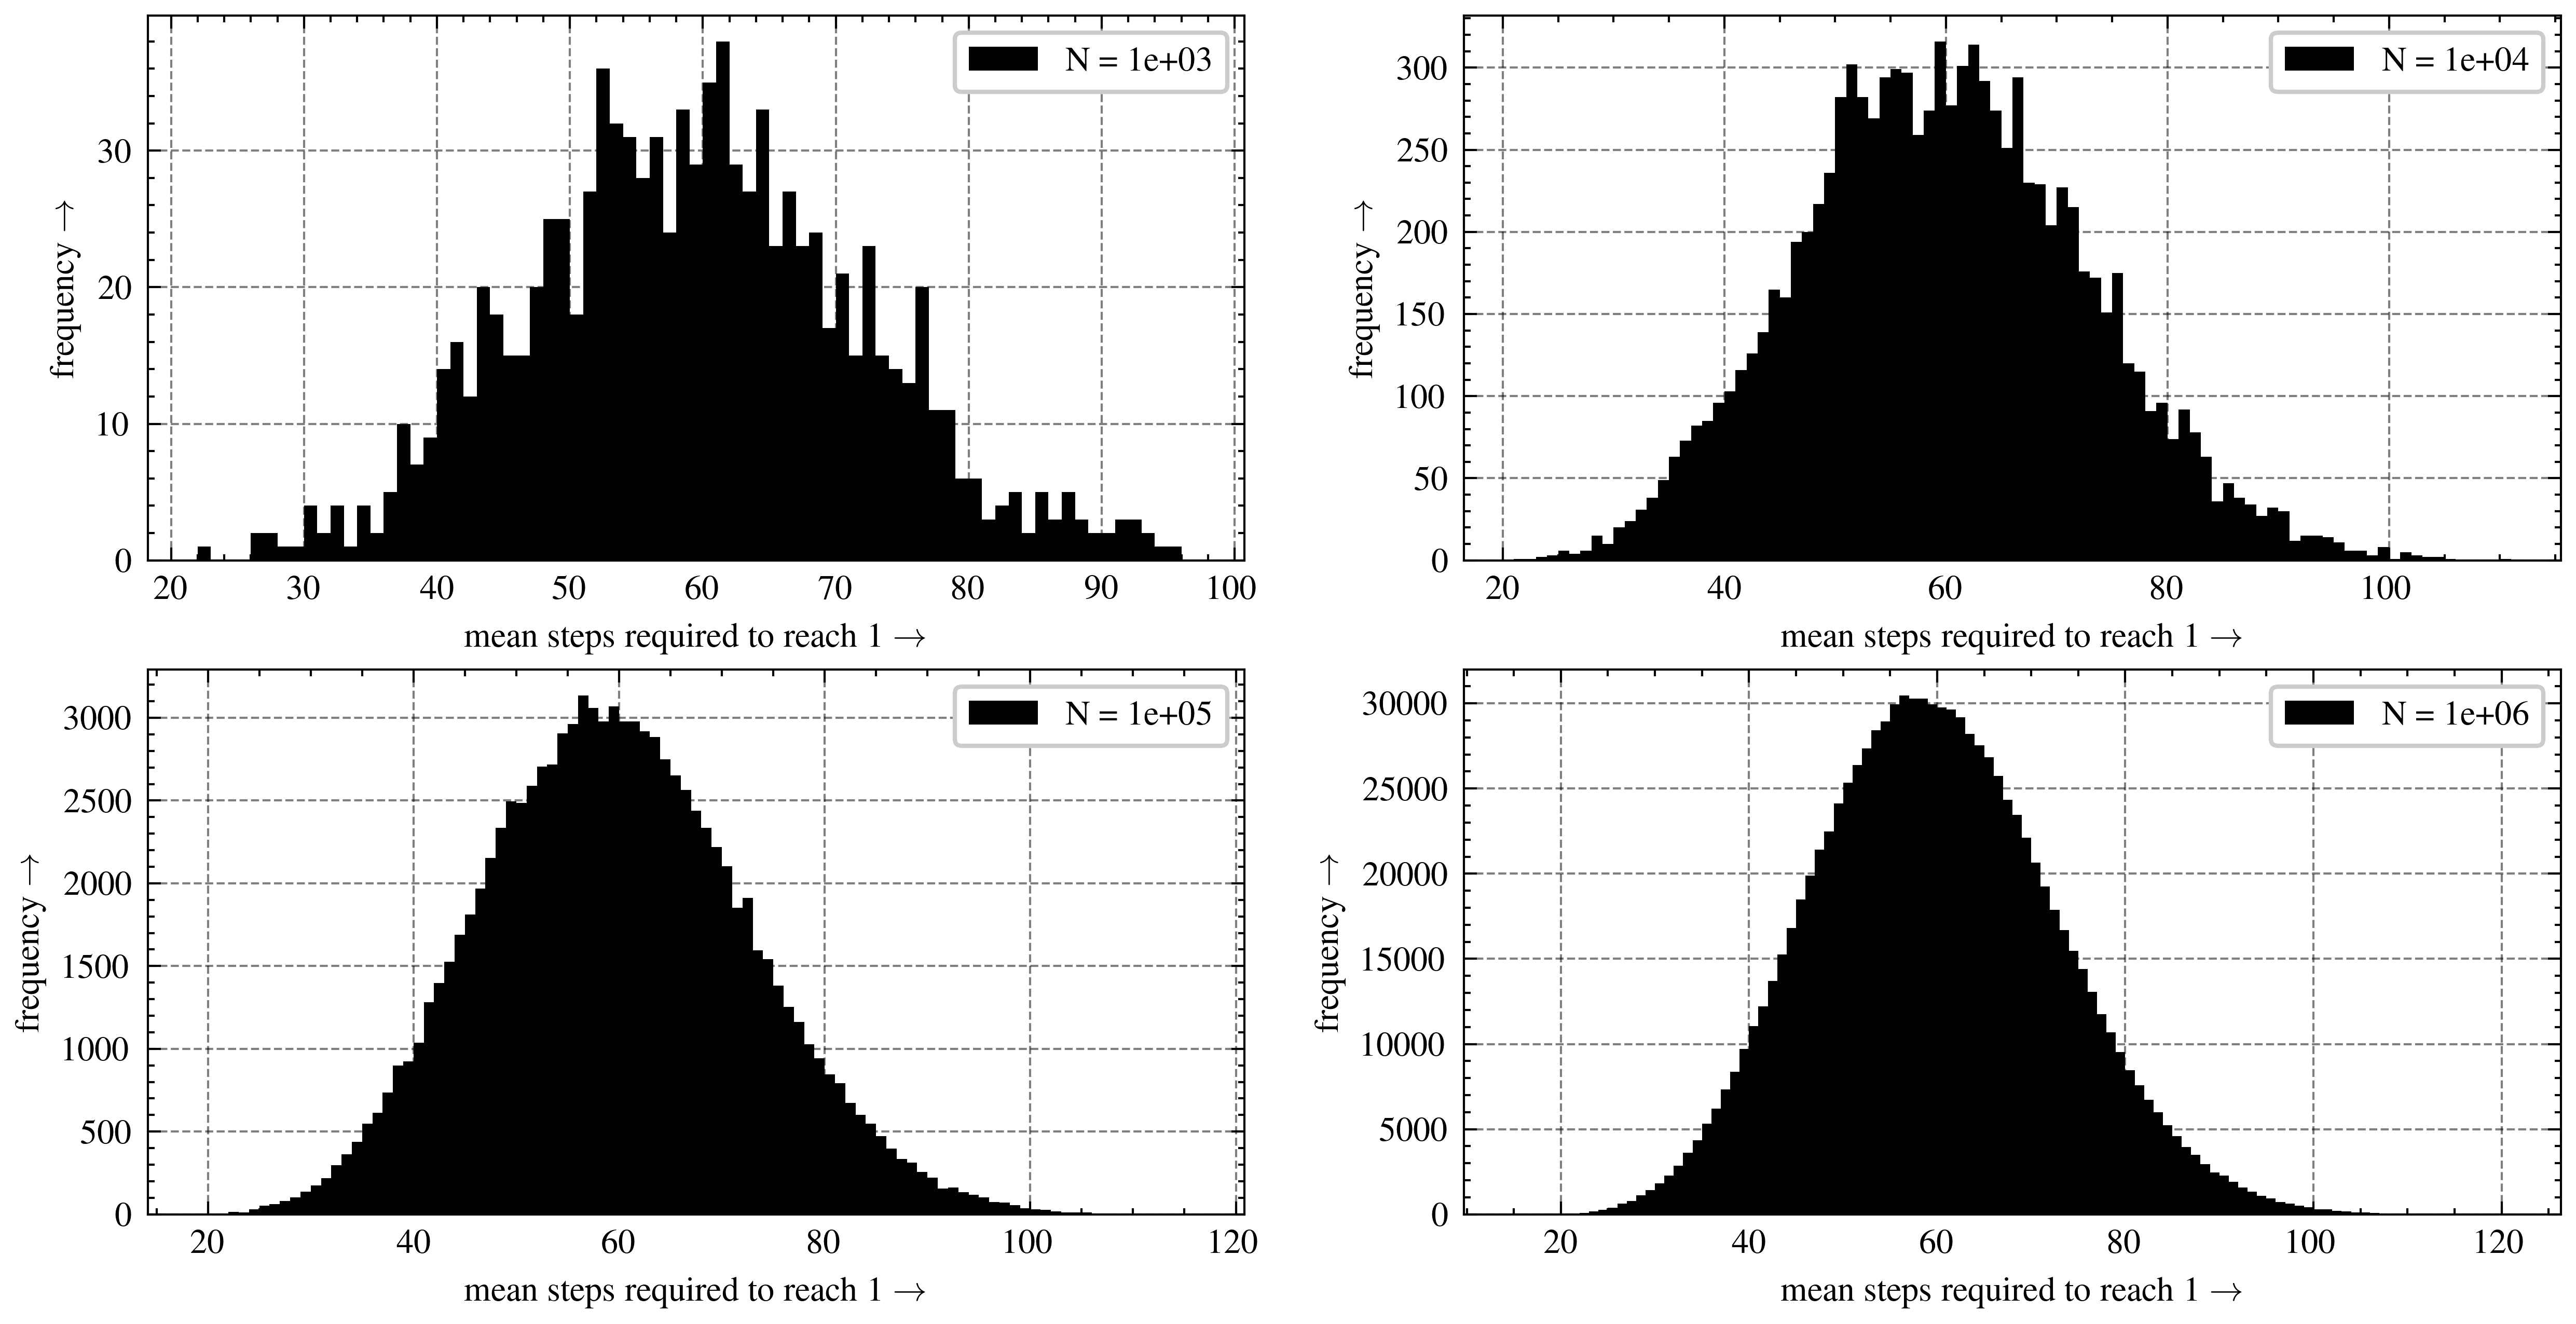

In [4]:
n = 10  # Number of samples taken in each experiment
N = 1e3, 1e4, 1e5, 1e6  # Number of experiments

for i in range(len(N)):
    # Randomly choosing `n` samples
    rand_steps = np.random.choice(collatz_steps, (int(N[i]), n))

    # Clculating the mean of the steps required of the `n` samples
    mean_steps = np.mean(rand_steps, axis=1)

    plt.subplot(ceil(len(N) / 2), ceil(len(N) / 2), i + 1)

    # Plotting a histogram of the mean steps required
    plt.hist(
        mean_steps,
        bins=np.arange(floor(min(mean_steps)), ceil(max(mean_steps)), 1),
        label=f"N = {N[i]:.0e}",
    )
    plt.legend()
    plt.xlabel("mean steps required to reach 1 $\\rightarrow$")
    plt.ylabel("frequency $\\rightarrow$")

plt.show()